In [1]:
from astropy.cosmology import Planck13
import pandas as pd
import numpy as np
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import disperse
from tqdm import tqdm

from scipy.spatial import ConvexHull
from matplotlib.path import Path

In [2]:
coma_ra_int = (130, 260)
coma_dec_int = (-10, 70)
coma_z_int = (0.00545, 0.04135)

In [3]:
cosmo = Planck13

In [4]:
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0

In [5]:
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [6]:
df = pd.DataFrame()
n_gal, ra, dec, z, r_max, m200, r200 = [], [], [], [], [], [], [] 
with open('SDSS/SDSS_DR12_optical_groups.dat') as f:
    for line in f:
        s = line.split()
        n_gal.append(int(s[1]))
        ra.append(float(s[2]))
        dec.append(float(s[3]))
        z.append(float(s[9]))
        r_max.append(float(s[13]))
        m200.append(float(s[14]))
        r200.append(float(s[15]))
df = df.assign(n_gal=n_gal)
df = df.assign(RA=ra)
df = df.assign(DEC=dec)
df = df.assign(Z=z)
df = df.assign(r_max=r_max)
df = df.assign(M200=m200)
df = df.assign(R200=r200)
df = df[
        (coma_ra_int[0] <= df['RA']) & (df['RA'] <= coma_ra_int[1]) & \
        (coma_dec_int[0] <= df['DEC']) & (df['DEC'] <=coma_dec_int[1]) & \
        (coma_z_int[0] <= df['Z']) & (df['Z'] <= coma_z_int[1])
    ]
df.to_csv('sdss_opt_gr_filtered_RaDecZ.csv', index=False)

In [7]:
df = pd.DataFrame()
ra, dec, z = [], [], []
with open('SDSS/SDSS_DR12_MGS.dat') as f:
    for line in f:
        s = line.split()
        ra.append(float(s[12]))
        dec.append(float(s[13]))
        z.append(float(s[8]))
df = df.assign(RA=ra)
df = df.assign(DEC=dec)
df = df.assign(Z=z)
df1 = df.copy()
df = df[
        (coma_ra_int[0] <= df['RA']) & (df['RA'] <= coma_ra_int[1]) & \
        (coma_dec_int[0] <= df['DEC']) & (df['DEC'] <=coma_dec_int[1]) & \
        (coma_z_int[0] <= df['Z']) & (df['Z'] <= coma_z_int[1])
    ]
df.to_csv('coma_DR12_filtered_RaDecZ.csv', index=False)

In [8]:
# coma_DR7 = pd.read_csv('coma_DR7_filtered_RaDecZ.csv')
coma_DR12 = pd.read_csv('coma_DR12_filtered_RaDecZ.csv')
# rosat = pd.read_csv('rosat_filtered_RaDecZ.csv')
sdss_opt_gr = pd.read_csv('sdss_opt_gr_filtered_RaDecZ.csv')
sdss_opt_gr = sdss_opt_gr[sdss_opt_gr['n_gal'] >= 15]
sdss_opt_gr['R'] = sdss_opt_gr['R200']
sdss_opt_gr.reset_index(drop=True, inplace=True)

In [9]:
# coma

In [10]:
sdss_opt_gr

,n_gal,RA,DEC,Z,r_max,M200,R200,R
0,180,246.942018,39.401823,0.031119,1.720684,635.8440,1.794430,1.794430
1,83,247.581739,39.778534,0.028910,1.040201,221.2070,1.262930,1.262930
2,101,246.935701,40.923333,0.031285,1.363890,307.1370,1.407870,1.407870
3,85,247.491124,40.610586,0.029515,1.029668,147.2880,1.102600,1.102600
4,34,246.010700,41.010818,0.030111,1.035922,135.6380,1.072530,1.072530
...,...,...,...,...,...,...,...,...
217,22,247.144612,8.529292,0.032348,0.760295,54.8312,0.792467,0.792467
218,22,179.565240,25.119524,0.015661,0.424296,18.0177,0.549744,0.549744
219,32,211.719008,55.039101,0.006525,0.544485,19.9125,0.569996,0.569996
220,15,165.703588,50.720856,0.022642,0.463985,12.5296,0.485982,0.485982


In [11]:
coma_DR12

,RA,DEC,Z
0,247.159333,39.551266,0.031252
1,246.358714,39.870696,0.029112
2,246.920352,39.383022,0.029601
3,246.842087,39.109641,0.033110
4,246.765044,39.527357,0.033841
...,...,...,...
57194,172.000815,25.069872,0.005537
57195,142.900640,27.296280,0.005956
57196,178.705527,6.709595,0.005738
57197,161.946250,46.879323,0.005694


In [12]:
sph2cart = 'dist'
in_cart_coords = True

In [13]:
DPS = disperse.Disperse3D(
    coma_DR12, '_disperse_03/bin/',
    H0, Om, Ol, Ok,
    sdss_opt_gr
)

In [14]:
DPS.count_cart_coords()

In [15]:
# CX = DPS.clusters['CX']
# CY = DPS.clusters['CY']
# CZ = DPS.clusters['CZ']

# CX_int = (CX.min(), CX.max())
# CY_int = (CY.min(), CY.max())
# CZ_int = (CZ.min(), CZ.max())

# np.random.seed(0)

# random_clusters_num = 5
# random_clusters = []
# for i in range(random_clusters_num):
#     cx = np.random.uniform(CX_int[0], CX_int[1], DPS.clusters.shape[0])
#     cy = np.random.uniform(CY_int[0], CY_int[1], DPS.clusters.shape[0])
#     cz = np.random.uniform(CZ_int[0], CZ_int[1], DPS.clusters.shape[0])
#     df = pd.DataFrame()
#     df = df.assign(CX=cx)
#     df = df.assign(CY=cy)
#     df = df.assign(CZ=cz)
#     ra, dec, z = DPS.cart2shp_ASTROPY(cx, cy, cz)
#     df = df.assign(RA=ra)
#     df = df.assign(DEC=dec)
#     df = df.assign(Z=z)
#     df = df.assign(R200=DPS.clusters['R200'])
#     random_clusters.append(df)

In [16]:
# CX_int = (DPS.galaxies['CX'].min(), DPS.galaxies['CX'].max())
# CY_int = (DPS.galaxies['CY'].min(), DPS.galaxies['CY'].max())
# CZ_int = (DPS.galaxies['CZ'].min(), DPS.galaxies['CZ'].max())

# points = np.array(DPS.galaxies[['CX', 'CY', 'CZ']])
# hull = ConvexHull(points)
# A, b = hull.equations[:, :-1], hull.equations[:, -1:]
# # eps = np.finfo(np.float32).eps
# eps = -5
# def contained(x):
#     return np.all(np.asarray(x) @ A.T + b.T < eps, axis=1)


# np.random.seed(0)

# random_clusters_num = 5
# random_clusters = []
# for i in range(random_clusters_num):
#     CX, CY, CZ = [], [], []
#     for j in tqdm(range(DPS.clusters.shape[0])):
#         fl = False
#         while not fl:
#             cx = np.random.uniform(CX_int[0], CX_int[1], 1)[0]
#             cy = np.random.uniform(CY_int[0], CY_int[1], 1)[0]
#             cz = np.random.uniform(CZ_int[0], CZ_int[1], 1)[0]
#             fl = contained([[cx, cy, cz]])
#         CX.append(cx)
#         CY.append(cy)
#         CZ.append(cz)
#     df = pd.DataFrame()
#     df = df.assign(CX=CX)
#     df = df.assign(CY=CY)
#     df = df.assign(CZ=CZ)
#     ra, dec, z = DPS.cart2shp_ASTROPY(CX, CY, CZ)
#     df = df.assign(RA=ra)
#     df = df.assign(DEC=dec)
#     df = df.assign(Z=z)
#     df = df.assign(R200=DPS.clusters['R200'])
#     random_clusters.append(df)

In [17]:
DPS.gen_random_clusters()

>>> Generate random clusters


In [18]:
SIGMA = 5
SMOOTH = 2
BOARD = 'smooth'
ANGLE = 30

In [19]:
DPS.apply_disperse(SIGMA, SMOOTH, BOARD, ANGLE, in_cart_coords)

>>> delaunay_3D starts
>>> mse starts
>>> skelconv starts
>>> read_skl_ascii_RaDecZ starts


In [20]:
cl_conn, fils_conn, _ = DPS.count_conn(
    [3] * sdss_opt_gr.shape[0],
#     DPS.random_clusters[1]
)

AxesSubplot(0.125,0.125;0.775x0.755)


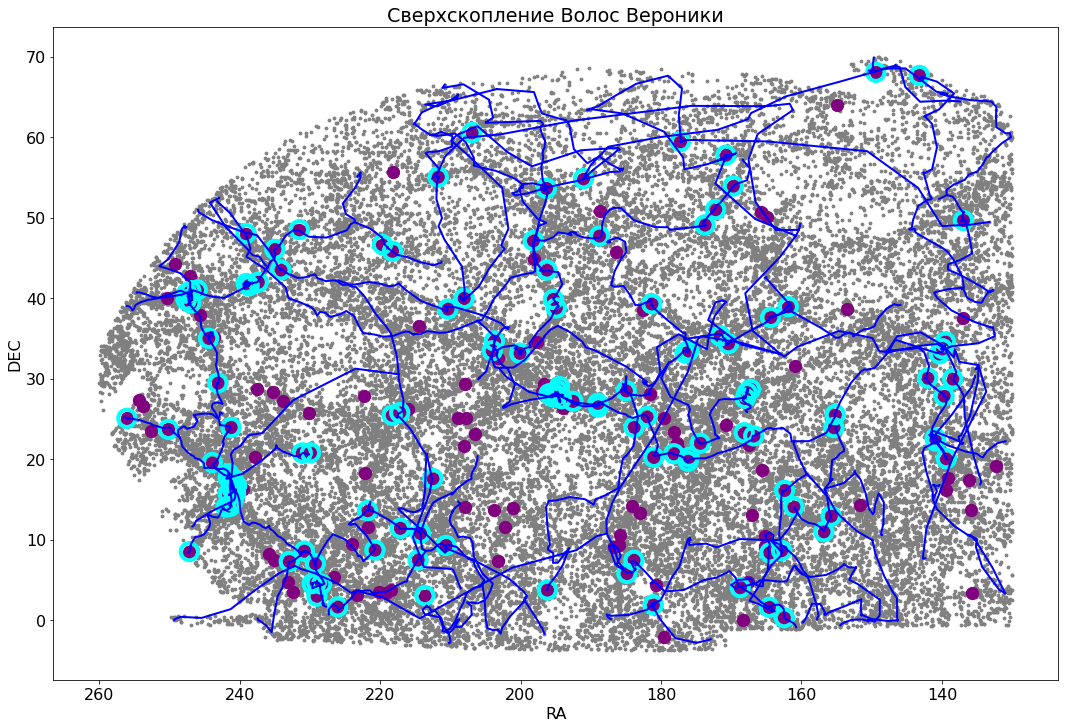

In [21]:
%matplotlib inline
fig, title = DPS.plot_2d(
    plot_cps=False, plot_only_max=False,
#     plot_fils=False,
#     plot_clusters=False,
    title='Сверхскопление Волос Вероники',
    cl_fils=list(map(lambda x: x>0, cl_conn)),
#     clusters=DPS.random_clusters[1]
)
# plt.savefig(title + '2D.jpg')

In [22]:
# %matplotlib widget
# fig, title = DPS.plot_3d(
#     plot_cps=False, plot_only_max=False,
# #     plot_fils=False, 
#     title='Coma cluster',
#     cl_fils=list(map(lambda x: x>0, cl_conn)),
# #     clusters=random_clusters[1]
# )
# plt.savefig(title + '3D.jpg')

In [23]:
df1

,RA,DEC,Z
0,122.060976,16.369133,0.101670
1,122.020980,16.360701,0.101815
2,121.985850,16.422769,0.102300
3,121.975488,16.490585,0.101155
4,121.947446,16.394023,0.099765
...,...,...,...
584444,121.015654,19.738861,0.000763
584445,127.134299,20.121031,0.000910
584446,176.746476,61.334978,0.000720
584447,230.474426,12.396286,0.000524


Text(0, 0.5, 'DEC')

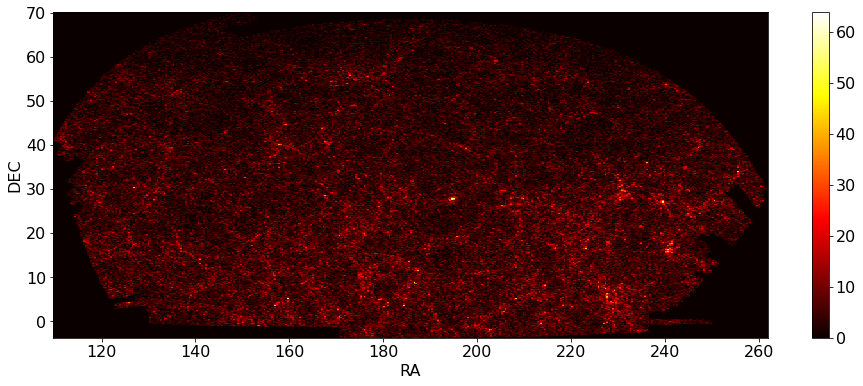

In [24]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(16, 6))

plt.hist2d(df1['RA'], df1['DEC'], 400, cmap=plt.cm.hot)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('DEC')